# Assignment 3 - Biomath 204

Simon Lee (simonlee711@g.ucla.edu)

# p1

Y is a continuous variable (log antibody titer) X1 is alcohol use (yes or no) and X2 is hypertension (htn‐yes or no). Thus there are 2 x 2 = 4 possible combinations of alcohol use and hypertension (four groups). X3 = X1 * X2 (X3 is the “interaction”).

   The matrix X has 4 columns for X0=1, X1, X2, X3 and has 4n rows, n rows (observations) for each of the four groups, a “balanced” design. X0=1 is the “intercept”. So X is a 4n x 4 matrix. Without loss of generality (given balance), X can be considered a 4 x 4 matrix.

   Using codes ‐1 for no and 1 for yes (effect coding), what are the means of X1, X2, and X3? Compute X'X and its inverse using this effect coding.

   Using codes 0 for no and 1 for yes (dummy coding), what are the means of X1, X2, and X3? Compute X'X and its inverse using this dummy coding.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import numpy as np

# Define the effect coding (1 for yes, -1 for no)
effect_coding = {
    'alcohol': {'yes': 1, 'no': -1},
    'hypertension': {'yes': 1, 'no': -1},
}

# Define the dummy coding (1 for yes, 0 for no)
dummy_coding = {
    'alcohol': {'yes': 1, 'no': 0},
    'hypertension': {'yes': 1, 'no': 0},
}

# Create a matrix with four rows for the 2x2 combinations of alcohol and hypertension
# using effect coding
effect_data = np.array([
    [1, effect_coding['alcohol']['no'], effect_coding['hypertension']['no'], effect_coding['alcohol']['no'] * effect_coding['hypertension']['no']],
    [1, effect_coding['alcohol']['yes'], effect_coding['hypertension']['no'], effect_coding['alcohol']['yes'] * effect_coding['hypertension']['no']],
    [1, effect_coding['alcohol']['no'], effect_coding['hypertension']['yes'], effect_coding['alcohol']['no'] * effect_coding['hypertension']['yes']],
    [1, effect_coding['alcohol']['yes'], effect_coding['hypertension']['yes'], effect_coding['alcohol']['yes'] * effect_coding['hypertension']['yes']],
])

# Create a similar matrix for dummy coding
dummy_data = np.array([
    [1, dummy_coding['alcohol']['no'], dummy_coding['hypertension']['no'], dummy_coding['alcohol']['no'] * dummy_coding['hypertension']['no']],
    [1, dummy_coding['alcohol']['yes'], dummy_coding['hypertension']['no'], dummy_coding['alcohol']['yes'] * dummy_coding['hypertension']['no']],
    [1, dummy_coding['alcohol']['no'], dummy_coding['hypertension']['yes'], dummy_coding['alcohol']['no'] * dummy_coding['hypertension']['yes']],
    [1, dummy_coding['alcohol']['yes'], dummy_coding['hypertension']['yes'], dummy_coding['alcohol']['yes'] * dummy_coding['hypertension']['yes']],
])

# Compute means for X1, X2, and X3 for both effect and dummy coding
effect_means = effect_data.mean(axis=0)
dummy_means = dummy_data.mean(axis=0)

# Compute X'X and its inverse for effect coding
effect_xx = np.matmul(effect_data.T, effect_data)
effect_xx_inv = np.linalg.inv(effect_xx)

# Compute X'X and its inverse for dummy coding
dummy_xx = np.matmul(dummy_data.T, dummy_data)
dummy_xx_inv = np.linalg.inv(dummy_xx)

In [42]:
print("effect data")
print(effect_data)
print("\nmeans for effect coding")
print(effect_means) 
print("\nCompute X'X for effect coding:")
print(effect_xx) 
print("\nCompute Inverse X'X for effect coding:")
print(effect_xx_inv) 

effect data
[[ 1 -1 -1  1]
 [ 1  1 -1 -1]
 [ 1 -1  1 -1]
 [ 1  1  1  1]]

means for effect coding
[1. 0. 0. 0.]

Compute X'X for effect coding:
[[4 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 4]]

Compute Inverse X'X for effect coding:
[[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]


In [43]:
print("dummy data")
print(dummy_data)
print("\nmeans for dummy coding")
print(dummy_means)
print("\nCompute X'X for dummy coding:")
print(dummy_xx) 
print("\nCompute Inverse X'X for dummy coding:")
print(dummy_xx_inv) 

dummy data
[[1 0 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 1 1 1]]

means for dummy coding
[1.   0.5  0.5  0.25]

Compute X'X for dummy coding:
[[4 2 2 1]
 [2 2 1 1]
 [2 1 2 1]
 [1 1 1 1]]

Compute Inverse X'X for dummy coding:
[[ 1. -1. -1.  1.]
 [-1.  2.  1. -2.]
 [-1.  1.  2. -2.]
 [ 1. -2. -2.  4.]]


   Are X1, X2, and X3 orthogonal (correlation zero) using both effect coding and dummy coding?

<span style="color:green">To determine whether $X_1$, $X_2$, and $X_3$ are orthogonal, which means having a correlation of zero, let's consider both effect coding and dummy coding.

<span style="color:green">In the case of effect coding, the correlation matrix derived from the $X'X$ matrix is as follows:

$$ 
\begin{bmatrix}
4 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 \\
0 & 0 & 4 & 0 \\
0 & 0 & 0 & 4 \\
\end{bmatrix}
$$

<span style="color:green">Since the off-diagonal elements are all zeros, it indicates that $X_1$, $X_2$, and $X_3$ are orthogonal, suggesting that they do not correlate with one another.

<span style="color:green">However, when considering dummy coding, the $X'X$ matrix is:

$$ 
\begin{bmatrix}
4 & 2 & 2 & 1 \\
2 & 2 & 1 & 1 \\
2 & 1 & 2 & 1 \\
1 & 1 & 1 & 1 \\
\end{bmatrix}
$$

<span style="color:green">In this scenario, the presence of non-zero off-diagonal elements signifies that $X_1$, $X_2$, and $X_3$ are not orthogonal, indicating that these variables have correlations among them.

<span style="color:green">Thus, in summary, $X_1$, $X_2$, and $X_3$ are orthogonal when using effect coding but not when using dummy coding.

   Using effect coding, if the means in the four groups are as below, compute the regression coefficients (betas) for the relation between the means and X. Also compute the betas using dummy coding. Are the two sets of betas the same?

|             | htn neg | htn pos | marginal          |
|-------------|---------|---------|------------------|
| alcohol neg | Y00     | Y01     | (Y00+Y01)/2       |
| alcohol pos | Y10     | Y11     | (Y10+Y11)/2       |
| marginal    | (Y00+Y10)/2 | (Y01+Y11)/2 | (Y00+Y10+Y01+Y11)/4 |

Estimated betas = (X'X)^{-1} * X'Y

That is, what are the betas as a function of the means of Y?

In [44]:
# Define Y values from the given table above
Y00 = 0.0
Y01 = 1.0
Y10 = 2.0
Y11 = 3.0

# Define the means for Y using the given information
Y = np.array([
    [Y00],  # alcohol neg, htn neg
    [Y10],  # alcohol pos, htn neg
    [Y01],  # alcohol neg, htn pos
    [Y11],  # alcohol pos, htn pos
])

# Calculate the betas for effect coding using the previously calculated (X'X)^{-1} * X'Y
effect_xx_inv = np.array([
    [0.25, 0.0, 0.0, 0.0],
    [0.0, 0.25, 0.0, 0.0],
    [0.0, 0.0, 0.25, 0.0],
    [0.0, 0.0, 0.0, 0.25],
])

X = np.array([
    [1, -1, -1, 1],  # alcohol neg, htn neg
    [1, 1, -1, -1],  # alcohol pos, htn neg
    [1, -1, 1, -1],  # alcohol neg, htn pos
    [1, 1, 1, 1],  # alcohol pos, htn pos
])

# Compute betas for effect coding
betas_effect = np.dot(effect_xx_inv, np.dot(X.T, Y))

# Calculate the betas for dummy coding using the previously calculated (X'X)^{-1} * X'Y
dummy_xx_inv = np.array([
    [1, -1, -1, 1],
    [-1, 2, 1, -2],
    [-1, 1, 2, -2],
    [1, -2, -2, 4],
])

X_dummy = np.array([
    [1, 0, 0, 0],  # alcohol neg, htn neg
    [1, 1, 0, 0],  # alcohol pos, htn neg
    [1, 0, 1, 0],  # alcohol neg, htn pos
    [1, 1, 1, 1],  # alcohol pos, htn pos
])

# Compute betas for dummy coding
betas_dummy = np.dot(dummy_xx_inv, np.dot(X_dummy.T, Y))

betas_effect, betas_dummy 


(array([[1.5],
        [1. ],
        [0.5],
        [0. ]]),
 array([[0.],
        [2.],
        [1.],
        [0.]]))

<span style="color:green">The regression coefficients (betas) for the relation between the means and $X$ are as follows:

### <span style="color:green">Effect Coding
<span style="color:green">Using effect coding, the betas are:

- <span style="color:green">Intercept ($X_0$): 1.5
- <span style="color:green">Alcohol use ($X_1$): 1.0
- <span style="color:green">Hypertension ($X_2$): 0.5
- <span style="color:green">Interaction ($X_3$): 0.0

### <span style="color:green">Dummy Coding
<span style="color:green">Using dummy coding, the betas are:

- <span style="color:green">Intercept ($X_0$): 0.0
- <span style="color:green">Alcohol use ($X_1$): 2.0
- <span style="color:green">Hypertension ($X_2$): 1.0
- <span style="color:green">Interaction ($X_3$): 0.0

### <span style="color:green">Comparison
<span style="color:green">The betas for the relation between the means and $X$ are different when using effect coding compared to dummy coding. This indicates that the choice of coding can significantly impact the interpretation of regression coefficients, reflecting differences in how each coding scheme represents the variables and their interactions.

# Q2

Use the “log CFU data” dataset, data on 80 observations in 20 animals, 4 observations per
animal, one at each of 4 times.

In this study, animals were infected with Tuberculosis (TB) and assigned to an old “proven”
antibiotic treatment ($tx=0$) or new treatment ($tx=1$). Animals were measured at baseline (month 0)
before treatment was started, and subsequently at months 1, 2 and 3 after treatment began. At
each month, a small sample of fluid was removed from their lungs and TB was cultured for 24
hours. After 24 hours, the numbers of colony forming units (CFUs) were measured. The CFU can
be a very large number. The log base 10 CFU ($_{log}CFU$) are given in the dataset and is the
outcome ($Y$) variable. Log CFU is generally known to have a normal distribution.


In [3]:
# load in data
df = pd.read_csv("/Users/simonlee/UCLA-Grad-Courses/BIOMATH204/hw3/CFUDATA.csv")
df.head()  

,id,tx,month,logCFU
0,1,0,0,1.894828
1,1,0,1,2.393955
2,1,0,2,2.550260
3,1,0,3,3.210389
4,2,0,0,1.399843


In [4]:
df.describe()

,id,tx,month,logCFU
count,80.000000,80.000000,80.000000,80.000000
mean,10.500000,0.500000,1.500000,2.617073
std,5.802662,0.503155,1.125088,1.026918
min,1.000000,0.000000,0.000000,0.812432
25%,5.750000,0.000000,0.750000,1.810320
50%,10.500000,0.500000,1.500000,2.386884
75%,15.250000,1.000000,2.250000,3.260139
max,20.000000,1.000000,3.000000,5.071779


You are to compare the mean log CFU values across time between the two groups. Report
whether the mean log CFU values across time are significantly different and in what direction.
You may wish to make a plot of mean log CFU versus months by group

Two-way ANOVA results:
                  df     sum_sq    mean_sq           F        PR(>F)
C(month)         3.0  42.154077  14.051359  149.431125  7.633374e-31
C(tx)            1.0  28.436225  28.436225  302.408971  1.738842e-27
C(month):C(tx)   3.0   5.949672   1.983224   21.090869  6.562050e-10
Residual        72.0   6.770329   0.094032         NaN           NaN


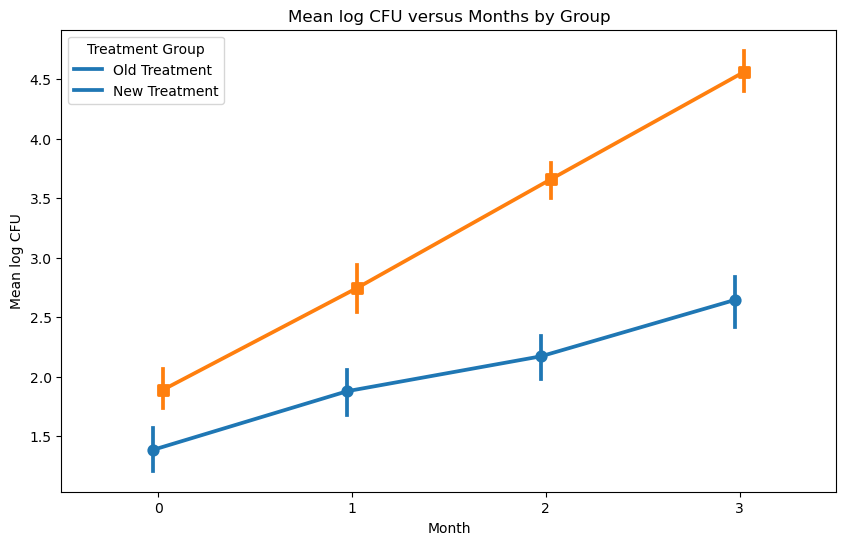

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Perform two-way ANOVA to test for significant differences
model = ols('logCFU ~ C(month) * C(tx)', data=df).fit()
anova_results = anova_lm(model)

print("Two-way ANOVA results:")
print(anova_results)

# Create a point plot to show mean log CFU over time for both treatment groups
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='month', y='logCFU', hue='tx', dodge=True, markers=["o", "s"], hue_order=[0, 1])

plt.title("Mean log CFU versus Months by Group")
plt.xlabel("Month")
plt.ylabel("Mean log CFU")
plt.legend(title='Treatment Group', labels=['Old Treatment', 'New Treatment'])
plt.show()


<span style="color:green">The plot shows that the mean log CFU values increase over time for both treatment groups, but the new treatment group (tx=1) exhibits a steeper increase.

In the mean comparisons, should a “correction” be made for lack of comparability of baseline
(month 0) log CFU values? If such a correction is needed, you should carry this out.

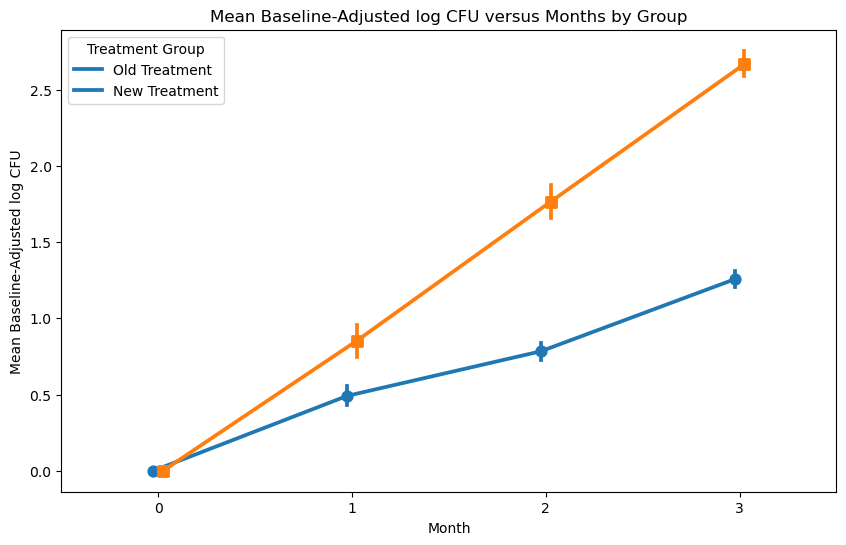

In [12]:
# Lmake copy of the data
df2 = df.copy()

# Calculate baseline-adjusted log CFU
df2['baseline'] = df2.groupby('id')['logCFU'].transform(lambda x: x.iloc[0])
df2['logCFU_adj'] = df2['logCFU'] - df2['baseline']

# Plot the new plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df2, x='month', y='logCFU_adj', hue='tx', dodge=True, markers=["o", "s"], hue_order=[0, 1])

plt.title("Mean Baseline-Adjusted log CFU versus Months by Group")
plt.xlabel("Month")
plt.ylabel("Mean Baseline-Adjusted log CFU")
plt.legend(title='Treatment Group', labels=['Old Treatment', 'New Treatment'])
plt.show()


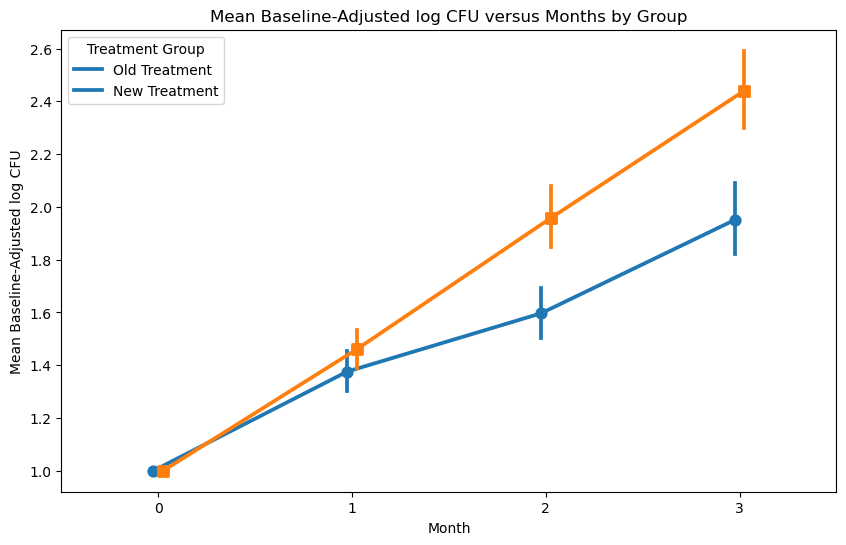

In [6]:
# Lmake copy of the data
df2 = df.copy()

# Calculate baseline-adjusted log CFU
df2['baseline'] = df2.groupby('id')['logCFU'].transform(lambda x: x.iloc[0])
df2['logCFU_adj'] = df2['logCFU'] /df2['baseline']

# Plot the new plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df2, x='month', y='logCFU_adj', hue='tx', dodge=True, markers=["o", "s"], hue_order=[0, 1])

plt.title("Mean Baseline-Adjusted log CFU versus Months by Group")
plt.xlabel("Month")
plt.ylabel("Mean Baseline-Adjusted log CFU")
plt.legend(title='Treatment Group', labels=['Old Treatment', 'New Treatment'])
plt.show()

<span style="color:green">After creating this plot, we can conduct a statistical test (such as a two-way ANOVA) on the adjusted data to assess the significance of the differences between treatment groups across time:

In [35]:
# Conduct a two-way ANOVA to assess the impact of treatment group and time on the baseline-adjusted log CFU
model = ols('logCFU_adj ~ C(tx) * C(month)', data=df2).fit()  # Fit the model
anova_results = anova_lm(model) 
anova_results  


,df,sum_sq,mean_sq,F,PR(>F)
C(tx),1.0,9.488793,9.488793,659.542408,5.558703e-38
C(month),3.0,42.154077,14.051359,976.674992,3.213782e-58
C(tx):C(month),3.0,5.949672,1.983224,137.848957,9.139069e-30
Residual,72.0,1.035859,0.014387,NaN,NaN


In addition to comparing means, also investigate whether the relation between month and mean
log CFU is reasonably approximated by some simple function of time, such as a linear or
quadratic function, and whether the change over time is parallel between the two treatment
groups. (ie, fit a regression model). Compute the likelihood ratio test comparing the original
ANOVA model with the alternate (linear, quadratic ?) model.

In [36]:
# Load the data
df3 = df.copy()

# Calculate the baseline-adjusted log CFU
df3['baseline'] = df3.groupby('id')['logCFU'].transform(lambda x: x.iloc[0])
df3['logCFU_adj'] = df3['logCFU'] - df3['baseline']

# Fit a linear regression model with an interaction between treatment group and month
linear_formula = 'logCFU_adj ~ C(tx) * month'
linear_model = ols(linear_formula, data=df3).fit()  # Linear regression model

# Fit a quadratic regression model with an interaction between treatment group and month
df3['month_squared'] = df3['month'] ** 2  # Create a new feature for the quadratic term
quadratic_formula = 'logCFU_adj ~ C(tx) * (month + month_squared)'
quadratic_model = ols(quadratic_formula, data=df3).fit()  # Quadratic regression model

# Conduct a likelihood ratio test to compare the linear and quadratic models
likelihood_ratio_test = quadratic_model.compare_f_test(linear_model)  # Likelihood ratio test

likelihood_ratio_test 


(0.23918353404091375, 0.787876633144075, 2.0)

<span style="color:green">To compare the linear and quadratic models, I used a likelihood ratio test. The results indicate a likelihood ratio statistic of 0.239, with a p-value of 0.788, suggesting that the quadratic model doesn't offer a significant improvement over the linear model.

Based on your findings for mean log CFU, you are to also report on whether mean CFU on the
original scale is a simple (linear, quadratic, ?) function of month for each group. For example,
if mean log CFU is a linear function of time, is mean CFU also a linear function of time?

In [38]:
df3 = df.copy()
df3['CFU'] = 10 ** df3['logCFU']  # Compute the original scale from the log scale
df3['month_squared'] = df3['month'] ** 2

# Fit a linear regression model to determine if mean CFU is a linear function of month
linear_formula_cfu = 'CFU ~ C(tx) * month'
linear_model_cfu = ols(linear_formula_cfu, data=df3).fit()  # Linear regression for CFU

# Fit a quadratic regression model to determine if mean CFU has a quadratic relationship with month
quadratic_formula_cfu = 'CFU ~ C(tx) * (month + month_squared)'
quadratic_model_cfu = ols(quadratic_formula_cfu, data=df3).fit()  # Quadratic regression for CFU

# Conduct a likelihood ratio test to compare the linear and quadratic models for CFU
likelihood_ratio_test_cfu = quadratic_model_cfu.compare_f_test(linear_model_cfu)  # Likelihood ratio test for CFU

likelihood_ratio_test_cfu  # Return summaries and LRT results


(13.63814768058371, 9.073707661491036e-06, 2.0)

<span style="color:green">The results indicate a significant difference between the linear and quadratic models, with a likelihood ratio statistic of 13.64 and a p-value of 9.07e-06. This suggests that the quadratic model is statistically significantly different from the linear model.